# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用密度聚类追踪共享单车分布

## 挑战介绍

本次挑战将考察密度聚类的应用。

## 挑战知识点

- DBSCAN 参数确定
- HDBSCAN 聚类

---

## 挑战内容

如今，共享单车已经遍布大街小巷，的确方便了市民的短距离出行。不过，如果你是一家共享单车公司的运营，是否会考虑这样一个问题，那就是**公司投放到城市中的共享单车都去哪里了呢？**

当然，这个问题并不是为了满足你的好奇心，而是通过追踪共享单车的分布状况及时调整运营策略。比如，有一些位置的单车密度过高，那么就应该考虑将其移动到一些密度低但有需求的区域。

所以，今天的挑战中，将会使用到密度聚类方法来追踪共享单车的分布情况。

### 数据集介绍

我们获取到北京市某一区域的共享单车 GPS 散点数据集，该数据集名称为 `challenge-9-bike.csv`。首先，下载并预览该数据集。

In [1]:
# !wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-9-bike.csv

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("challenge-9-bike.csv")
df.describe()

,lat,lon
count,3000.000000,3000.000000
mean,39.908308,116.474630
std,0.007702,0.018098
min,39.893939,116.434264
25%,39.902769,116.461276
50%,39.907888,116.477683
75%,39.914482,116.490274
max,39.923023,116.501467


其中，`lat` 是 latitude 的缩写，表示纬度，`lon` 是 longitude 的缩写，表示经度。于是，我们就可以通过 Matplotlib 绘制出该区域共享单车的分布情况。

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

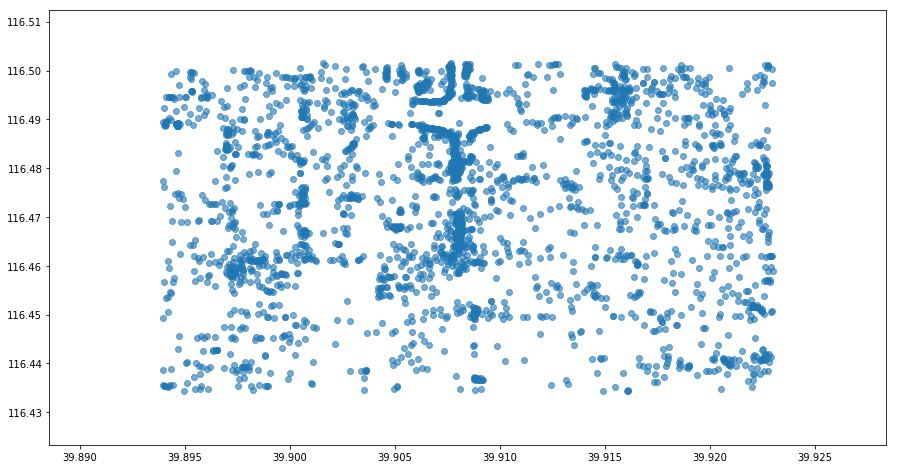

In [4]:
plt.figure(figsize=(15,8))
plt.scatter(df['lat'], df['lon'], alpha=.6)

我们可以使用第三方工具将对应的经纬度坐标放置到地图中呈现。

In [1]:
from IPython.display import IFrame

IFrame('https://geohey.com/apps/dataviz/58cb59a4012a473e8b32207920e6993e/share?ak=ZDY2MTZkMzY4YzM0NGY3YmFhZmNhYzM3YTU1ZmY5Zjg', width=900, height=600)

接下来，我们尝试使用 DBSCAN 密度聚类算法对共享单车进行聚类，看一看共享单车高密度区域的分布情况。(可能会失效，对挑战无影响)

根据前一节实验课程可知，DBSCAN 算法的两个关键参数是 `eps` 和密度阈值 `MinPts`。那么这两个值设定为多少比较合适呢？

---

**<font color='red'>挑战</font>：使用 HDSCAN 算法完成共享单车 GPS 散点数据密度聚类，需要确定 `eps` 和 `min_samples` 参数。**

**<font color='blue'>规定</font>**：假设半径 `100` 米范围内有 `10` 辆车为高密度区域。

**<font color='green'>提示</font>**：挑战以纬度变化为参考，初略估算纬度变化 `1` 度，对应该区域 `100km` 的地面距离。

In [6]:
from sklearn.cluster import DBSCAN

### 代码开始 ### (≈ 2 行代码)
dbscan_m = DBSCAN(eps=0.001, min_samples=10)
dbscan_c = dbscan_m.fit_predict(df)
### 代码结束 ###
dbscan_c # 输出聚类标签

array([ 0,  1, -1, ...,  2, 12, 12])

**运行测试：**

In [7]:
np.mean(dbscan_c)

6.977333333333333

**期望输出：**

<center>**`6.977333333333333`**</center>

---

**<font color='red'>挑战</font>：针对上面聚类后数据，按要求重新绘制散点图。**

**<font color='blue'>规定</font>**：未被聚类的异常点以 `alpha=0.1` 蓝色数据点呈现，聚类数据按类别呈现且设置 `cmap='viridis'`。

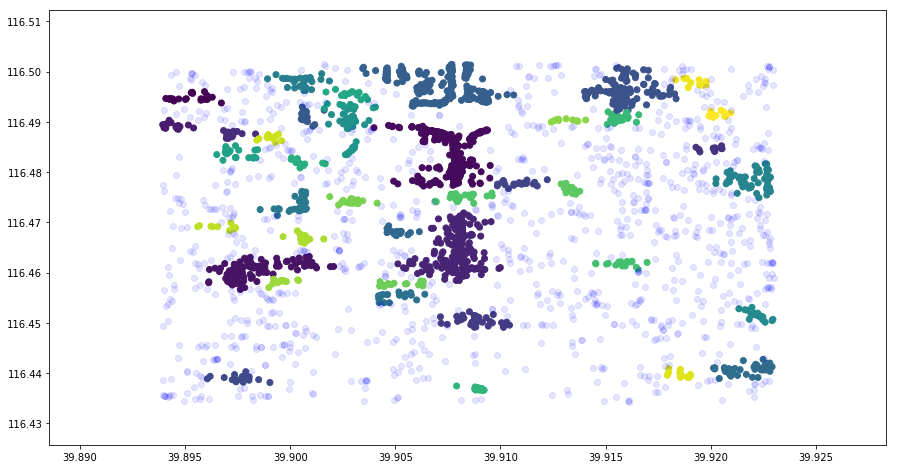

In [8]:
### 代码开始 ### (≈ 4~8 行代码)
df_c = pd.concat([df, pd.DataFrame(dbscan_c, columns=['clusters'])], axis=1)

df_n = df_c[df_c['clusters']!=-1]
df_o = df_c[df_c['clusters']==-1]

plt.figure(figsize=(15,8))
plt.scatter(df_n['lat'], df_n['lon'], c=df_n['clusters'], cmap='viridis')
plt.scatter(df_o['lat'], df_o['lon'], alpha=.1, c='b')
### 代码结束 ###

**期望输出：**

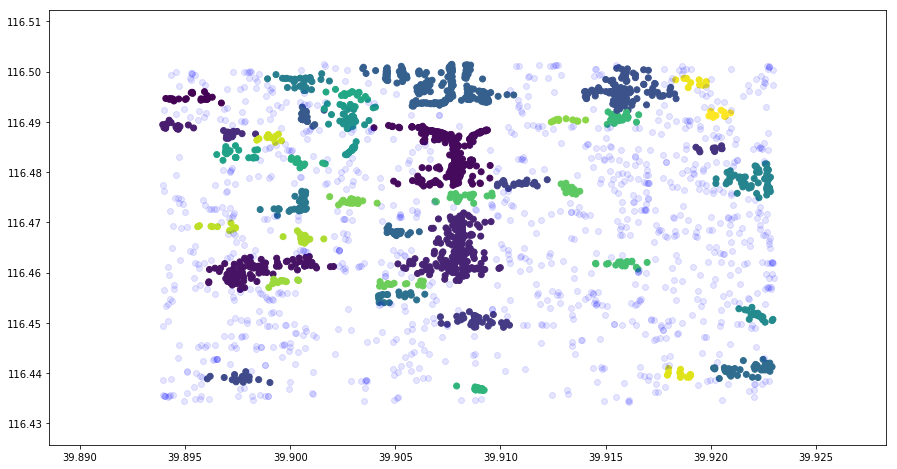

从上图可以看出，不同区域的单车密度分布情况。

HDSCAN 算法很多时候不仅仅是完成聚类，由于其本身的特性，很多时候还用其识别异常点。在本次实验中，我们同样可以通过调节参数来识别位置异常的共享单车。

---

**<font color='red'>挑战</font>：针对聚类后数据，将异常点（不符合半径 100 米内有 2 辆共享单车）绘制到散点图。**

**<font color='blue'>规定</font>**：未被聚类的异常点以红色数据点呈现，聚类数据按类别呈现且设置 `cmap='viridis', alpha=.1`。

In [ ]:
### 代码开始 ### (≈ 6~10 行代码)
plt.figure(figsize=(15,8))

dbscan_m = DBSCAN(eps=0.001, min_samples=2)
dbscan_c = dbscan_m.fit_predict(df)
dbscan_c

df_c = pd.concat([df, pd.DataFrame(dbscan_c, columns=['clusters'])], axis=1)

df_n = df_c[df_c['clusters']!=-1]
df_o = df_c[df_c['clusters']==-1]

plt.scatter(df_n['lat'], df_n['lon'], c=df_n['clusters'], cmap='viridis', alpha=.1)
plt.scatter(df_o['lat'], df_o['lon'], c='r')
### 代码结束 ###

**期望输出：**

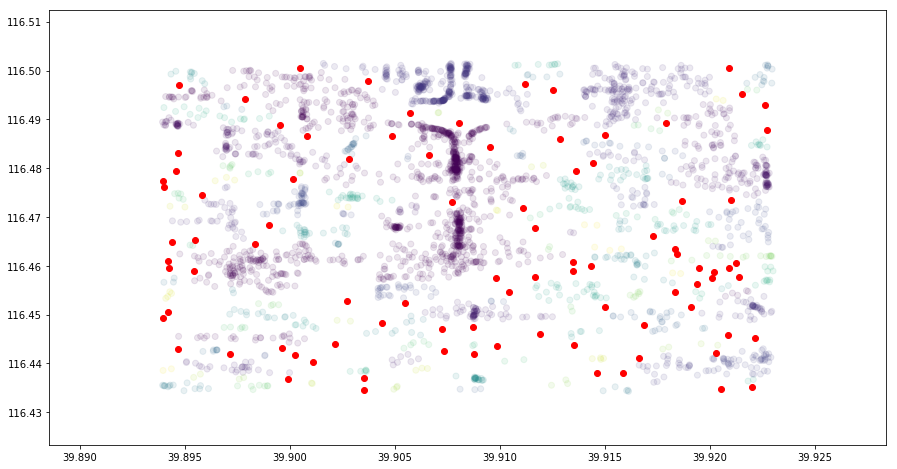

本次挑战主要是了解了如何快速确定 DBSCAN 初始参数以及使用该算法标记离群点的方法。如果你有兴趣，还可以自行尝试使用 HDBSCAN 聚类，并对比二者的聚类效果。当然，在这之前你需要先使用实验课程中的方法安装 hdbscan 模块。

In [ ]:
# 自行练习


---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>